<AxesSubplot: title={'center': 'Unemployment rate (US) - monthly'}, xlabel='Date'>

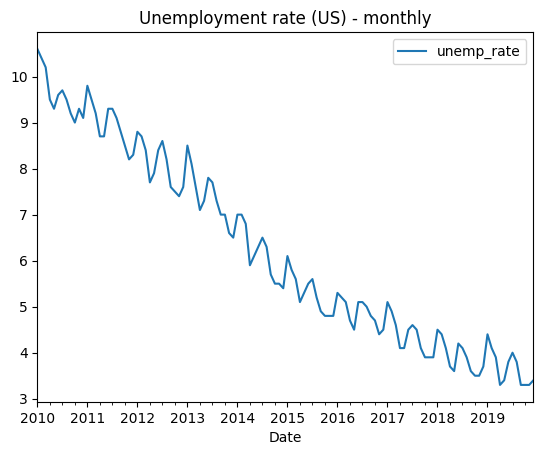

In [1]:
#Machine Learning-Based Approaches to Time Series Forecasting
#Validation methods for time series
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = "uLwMFhygQHyTJGEJ6QM3"

df = (
 nasdaqdatalink.get(dataset="FRED/UNRATENSA",
 start_date="2010-01-01",
 end_date="2019-12-31")
 .rename(columns={"Value": "unemp_rate"})
)
df.plot(title="Unemployment rate (US) - monthly")

In [2]:
df["linear_trend"] = range(len(df))
df["month"] = df.index.month

In [3]:
month_dummies = pd.get_dummies(
 df["month"], drop_first=True, prefix="month"
)


In [4]:
df = df.drop(columns=["month"])
df = df.join(month_dummies)


In [5]:

X = df.copy()
y = X.pop("unemp_rate")

expanding_cv = TimeSeriesSplit(n_splits=5, test_size=12)
for fold, (train_ind, valid_ind) in enumerate(expanding_cv.split(X)):
    print(f"Fold {fold} ----")
    print(f"Train indices: {train_ind}")
    print(f"Valid indices: {valid_ind}")

Fold 0 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Valid indices: [60 61 62 63 64 65 66 67 68 69 70 71]
Fold 1 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Valid indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Fold 2 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]
Valid indices: [84 85 86 87 88 89 90 91 92 93 94 95]
Fold 3 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [6]:
scores = []
for train_ind, valid_ind in expanding_cv.split(X):
 lr = LinearRegression()
 lr.fit(X.iloc[train_ind], y.iloc[train_ind])
 y_pred = lr.predict(X.iloc[valid_ind])
 scores.append(
 mean_absolute_percentage_error(y.iloc[valid_ind], y_pred)
 )
print(f"Scores: {scores}")
print(f"Avg. score: {np.mean(scores)}")

Scores: [0.037050793123894796, 0.07828415627306327, 0.11981060282172912, 0.16829494012910828, 0.2546045965163409]
Avg. score: 0.13160901777282724


In [7]:
#Instead of iterating over the splits, we can easily use the cross_validate function from scikitlearn:
cv_scores = cross_validate(
 LinearRegression(),
 X, y,
 cv=expanding_cv,
 scoring=["neg_mean_absolute_percentage_error",
 "neg_root_mean_squared_error"]
)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error
0,0.003988,0.001995,-0.037051,-0.232500
1,0.003993,0.002990,-0.078284,-0.433547
2,0.002993,0.001994,-0.119811,-0.520073
3,0.002995,0.003986,-0.168295,-0.662540
4,0.003992,0.002992,-0.254605,-0.928998


In [8]:
sliding_cv = TimeSeriesSplit(
 n_splits=5, test_size=12, max_train_size=60
)
for fold, (train_ind, valid_ind) in enumerate(sliding_cv.split(X)):
 print(f"Fold {fold} ----")
 print(f"Train indices: {train_ind}")
 print(f"Valid indices: {valid_ind}")

Fold 0 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Valid indices: [60 61 62 63 64 65 66 67 68 69 70 71]
Fold 1 ----
Train indices: [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Valid indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Fold 2 ----
Train indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]
Valid indices: [84 85 86 87 88 89 90 91 92 93 94 95]
Fold 3 ----
Train indices: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93 94 9

In [9]:
cv_scores = cross_validate(
 LinearRegression(),
 X, y,
 cv=sliding_cv,
 scoring=["neg_mean_absolute_percentage_error",
 "neg_root_mean_squared_error"]
)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error
0,0.002990,0.002993,-0.037051,-0.232500
1,0.003988,0.002992,-0.097125,-0.524333
2,0.002992,0.001993,-0.126609,-0.550749
3,0.002993,0.002997,-0.129454,-0.518194
4,0.003990,0.001993,-0.108759,-0.407428


In [10]:
#Feature engineering for time series
import numpy as np
import pandas as pd
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklego.preprocessing import RepeatingBasisFunction

np.random.seed(42)
range_of_dates = pd.date_range(start="2017-01-01",
 end="2019-12-31")
X = pd.DataFrame(index=range_of_dates)
X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year
signal_1 = 2 + 3 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 2 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.81, len(X))
y = signal_1 + signal_2 + noise

<AxesSubplot: title={'center': 'Generated time series'}>

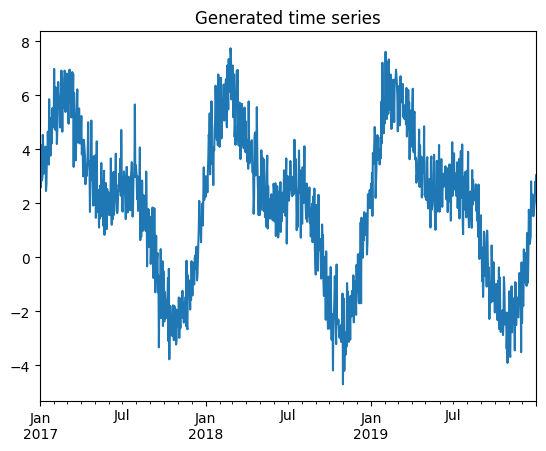

In [11]:
y.name = "y"
y.plot(title="Generated time series")
#Generate a time series with repeating patterns:

In [12]:
results_df = y.to_frame()
results_df.columns = ["y_true"]

X_1 = pd.get_dummies(
 X.index.month, drop_first=True, prefix="month"
)
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2017-01-01,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,0,0,0,0,0,0,0,0,0,0,0
2017-01-03,0,0,0,0,0,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0,0,0,0,0,0
2017-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0,0,0,0,0,0,0,0,0,1
2019-12-28,0,0,0,0,0,0,0,0,0,0,1
2019-12-29,0,0,0,0,0,0,0,0,0,0,1
2019-12-30,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot: title={'center': 'Fit using month dummies'}>

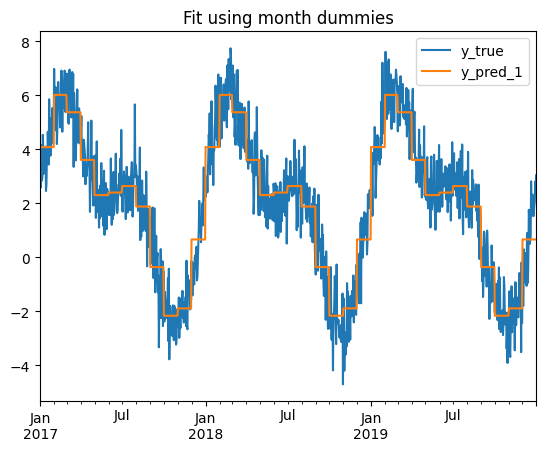

In [13]:
model_1 = LinearRegression().fit(X_1, y)
results_df["y_pred_1"] = model_1.predict(X_1)
(
 results_df[["y_true", "y_pred_1"]]
 .plot(title="Fit using month dummies")
)
#Fit a linear regression model and plot the in-sample prediction:

Text(0.5, 0.98, 'Cyclical encoding with sine/cosine transformation')

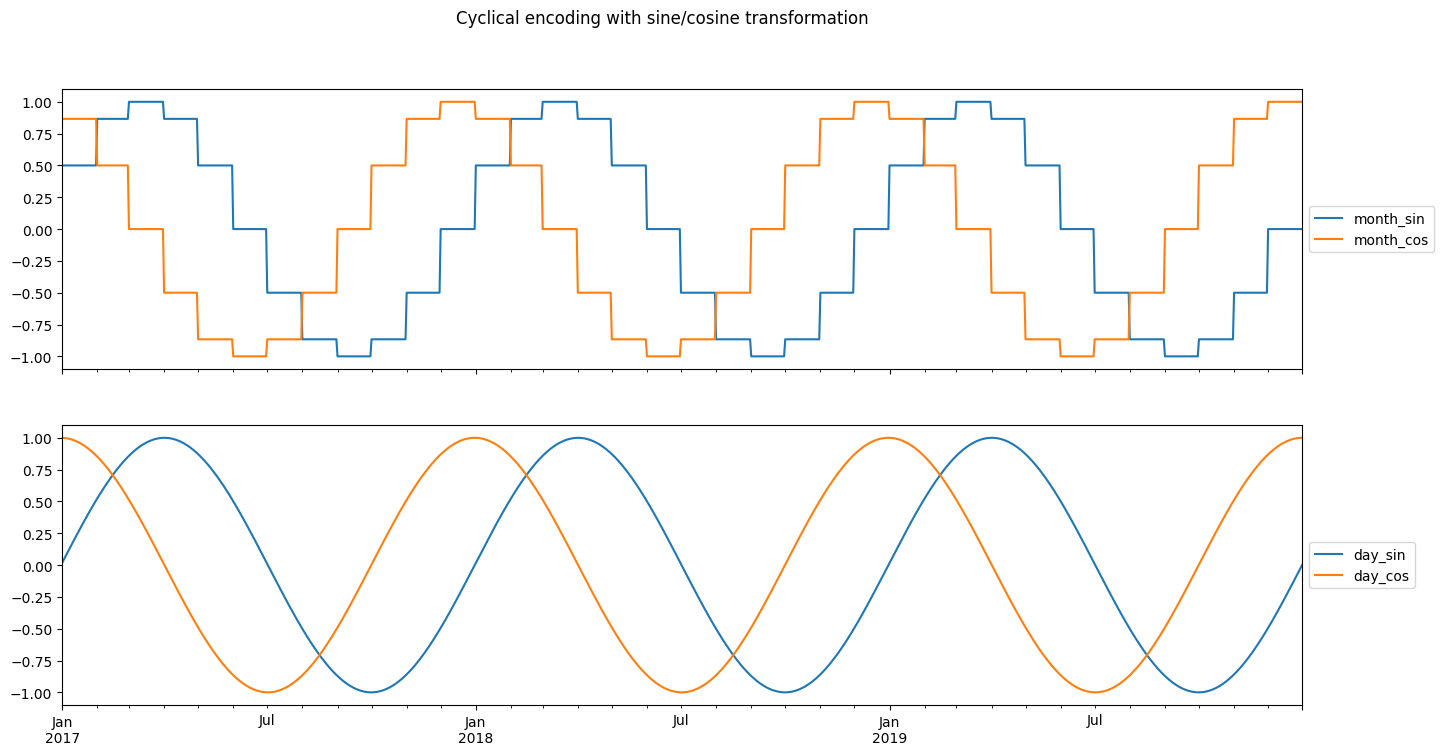

In [14]:
'''
We can clearly see the stepwise pattern of the fit, corresponding to 12 unique values of the 
month feature. The jaggedness of the fit is caused by the discontinuity of the dummy features. 
With the other approaches, we try to overcome that issue.

'''
import matplotlib.pyplot as plt
def sin_transformer(period):
     return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
def cos_transformer(period):
     return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))
    
X_2 = X.copy()
X_2["month"] = X_2.index.month
X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]
X_2["day_sin"] = (
 sin_transformer(365).fit_transform(X_2)["day_of_year"]
)
X_2["day_cos"] = (
 cos_transformer(365).fit_transform(X_2)["day_of_year"]
)
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
ax[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
ax[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.suptitle("Cyclical encoding with sine/cosine transformation")

<AxesSubplot: title={'center': 'Cyclical encoding using sine/cosine transformations'}, xlabel='month_sin', ylabel='month_cos'>

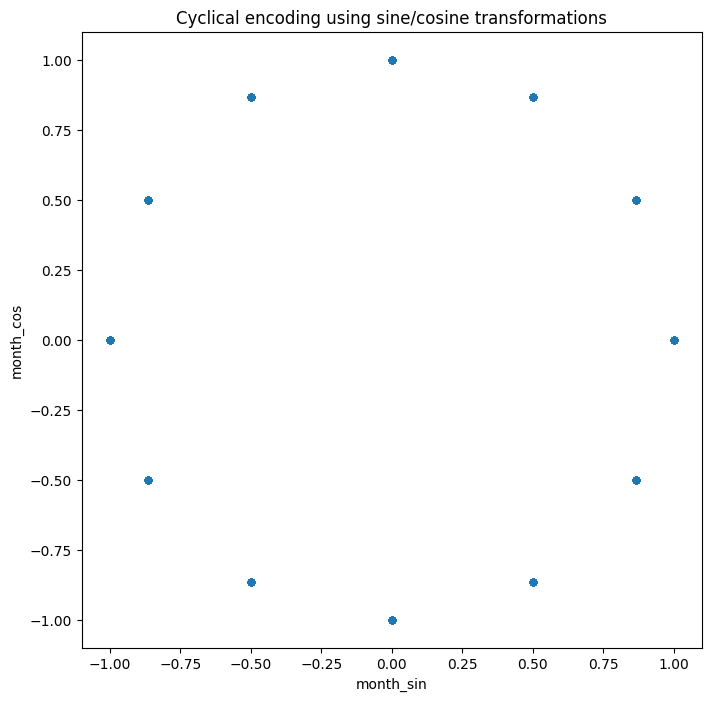

In [15]:
(
 X_2[X_2.index.year == 2017]
 .plot(
 kind="scatter",
 x="month_sin",
 y="month_cos",
 figsize=(8, 8),
 title="Cyclical encoding using sine/cosine transformations"
 )
)

<AxesSubplot: title={'center': 'Fit using sine/cosine features'}>

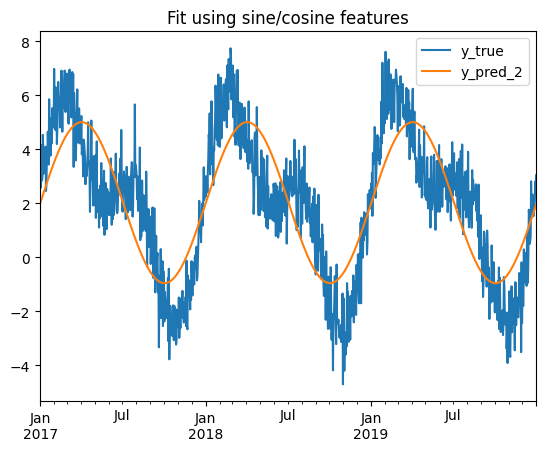

In [16]:
X_2 = X_2[["day_sin", "day_cos"]]
model_2 = LinearRegression().fit(X_2, y)
results_df["y_pred_2"] = model_2.predict(X_2)
(
 results_df[["y_true", "y_pred_2"]]
 .plot(title="Fit using sine/cosine features")
)
#Create features using the trigonometric functions:

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

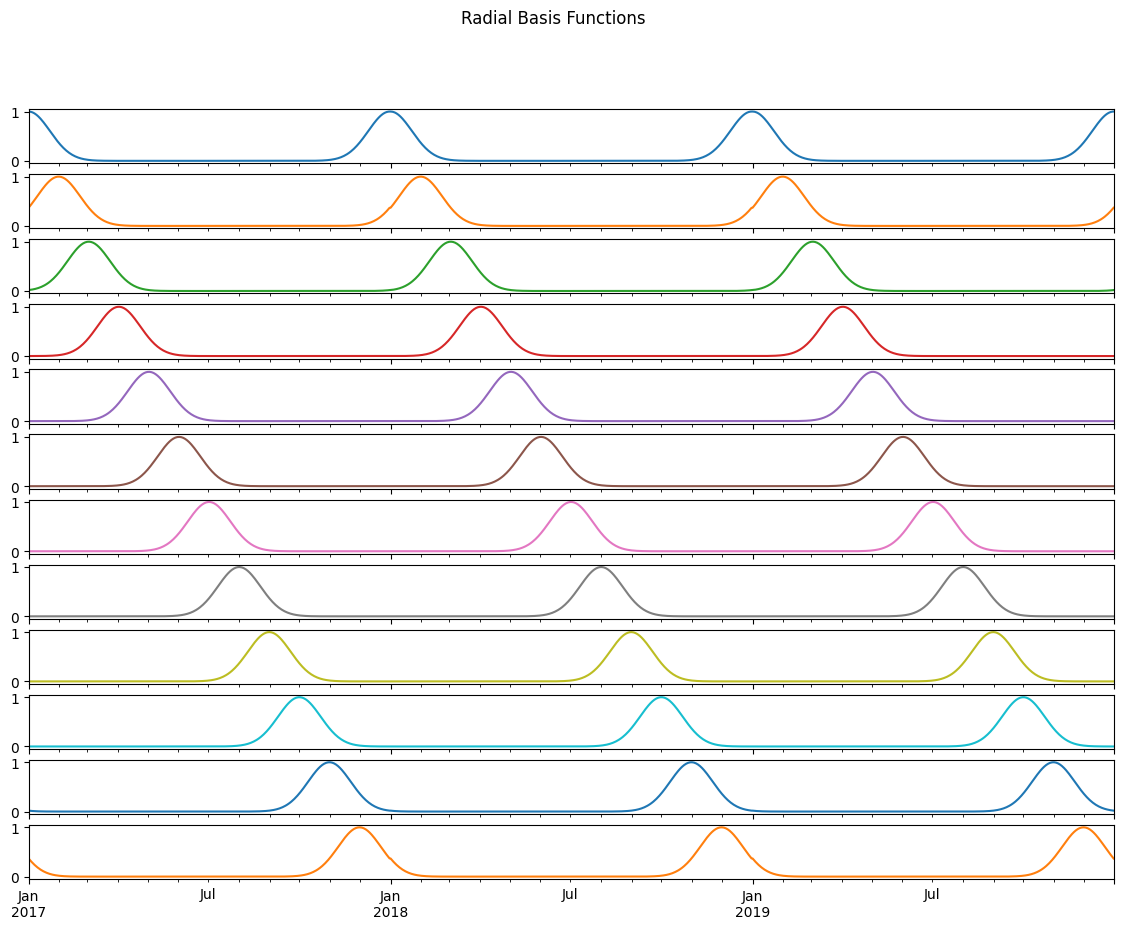

In [17]:
rbf = RepeatingBasisFunction(n_periods=12,
 column="day_of_year",
 input_range=(1,365),
 remainder="drop")
rbf.fit(X)
X_3 = pd.DataFrame(index=X.index,
 data=rbf.transform(X))
X_3.plot(subplots=True, sharex=True,
 title="Radial Basis Functions",
 legend=False, figsize=(14, 10))
#Create features using the radial basis functions

<AxesSubplot: title={'center': 'Fit using RBF features'}>

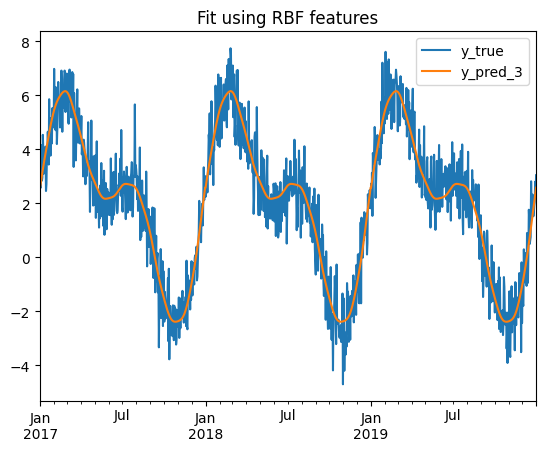

In [18]:
'''
Each curve tells us how close we are to a certain day of the year. For example, 
the first curve measures the distance from January 1st. As such, we can observe a peak on the 
first day of every year, and then it decreases symmetrically as we move away from that date.
'''

model_3 = LinearRegression().fit(X_3, y)
results_df["y_pred_3"] = model_3.predict(X_3)
(
 results_df[["y_true", "y_pred_3"]]
 .plot(title="Fit using RBF features")
)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='unemp_rate'>)

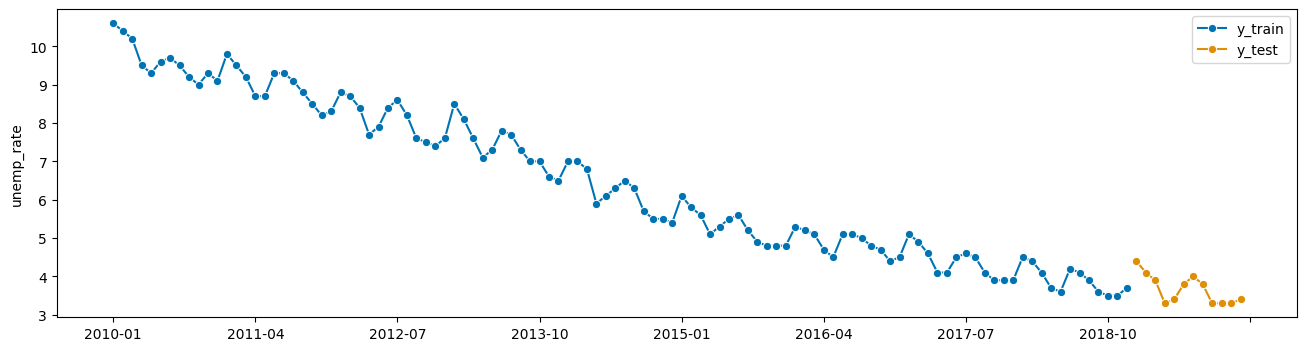

In [57]:
#Time series forecasting as reduced regression
'''
Given the temporal dependency of the time series data 
(relevant for the lagged values of the time se-ries),
we cannot directly use regression models for time series forecasting.
First, we need to convert such temporal data into a supervised learning problem, 
to which we can apply traditional regression algorithms. 
That process is called reduction 
and it decomposes certain learning tasks (time series forecasting) into simpler tasks.

Hence, in reduced regression, we are efectively transforming a forecasting task into a tabular regression problem

'''
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import (
 temporal_train_test_split, ExpandingWindowSplitter
)

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
 make_reduction, TransformedTargetForecaster, EnsembleForecaster
)
from sktime.performance_metrics.forecasting import (
 mean_absolute_percentage_error
)
from sktime.transformations.series.detrend import (
 Deseasonalizer, Detrender
)
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.arima import AutoARIMA
from sklearn.ensemble import RandomForestRegressor
nasdaqdatalink.ApiConfig.api_key = "uLwMFhygQHyTJGEJ6QM3"

df = (
 nasdaqdatalink.get(dataset="FRED/UNRATENSA",
 start_date="2010-01-01",
 end_date="2019-12-31")
 .rename(columns={"Value": "unemp_rate"})
)

df["linear_trend"] = range(len(df))
df["month"] = df.index.month
X = df.copy()
y = X.pop("unemp_rate")
y.index = y.index.to_period("M")
y_train, y_test = temporal_train_test_split(
    y, test_size=12
)

plot_series(
    y_train, y_test,
    labels=["y_train", "y_test"]
)


In [58]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', is_relative=False)

In [59]:
regressor = RandomForestRegressor(random_state=42)
rf_forecaster = make_reduction(
    estimator=regressor,
    strategy="recursive",
    window_length=12
)
rf_forecaster.fit(y_train)
y_pred_1 = rf_forecaster.predict(fh)

Text(0.5, 1.0, 'MAPE: 7.04%')

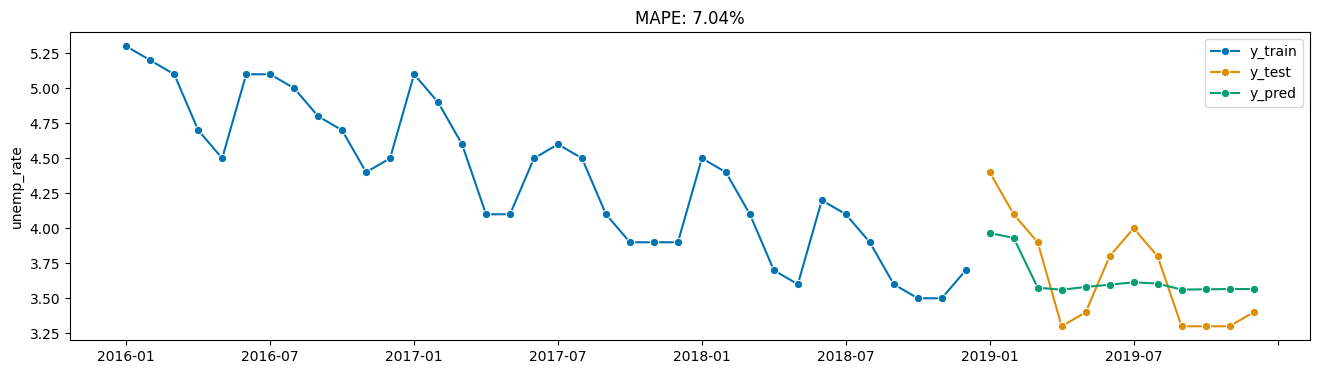

In [60]:
mape_1 = mean_absolute_percentage_error(
    y_test, y_pred_1, symmetric=False
)
fig, ax = plot_series(
    y_train["2016":], y_test, y_pred_1,
    labels=["y_train", "y_test", "y_pred"])
ax.set_title(f"MAPE: {100*mape_1:.2f}%")

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='unemp_rate'>)

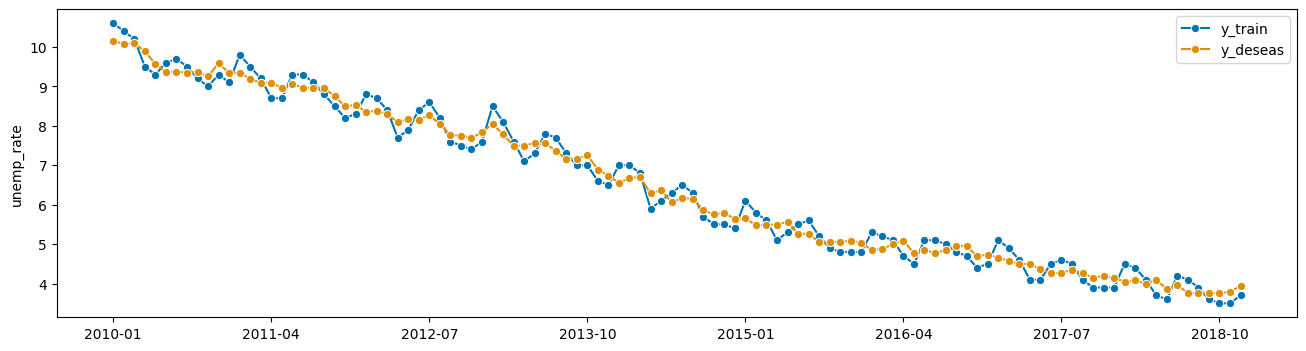

In [61]:
deseasonalizer = Deseasonalizer(model="additive", sp=12)
y_deseas = deseasonalizer.fit_transform(y_train)
plot_series(
    y_train, y_deseas,
    labels=["y_train", "y_deseas"]
)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='seasonal'>)

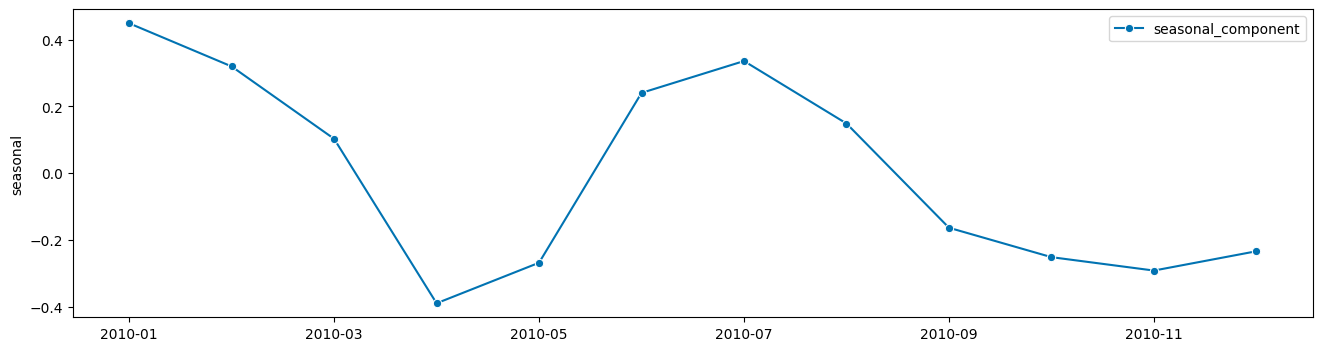

In [62]:
plot_series(
    deseasonalizer.seasonal_,
    labels=["seasonal_component"])

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='unemp_rate'>)

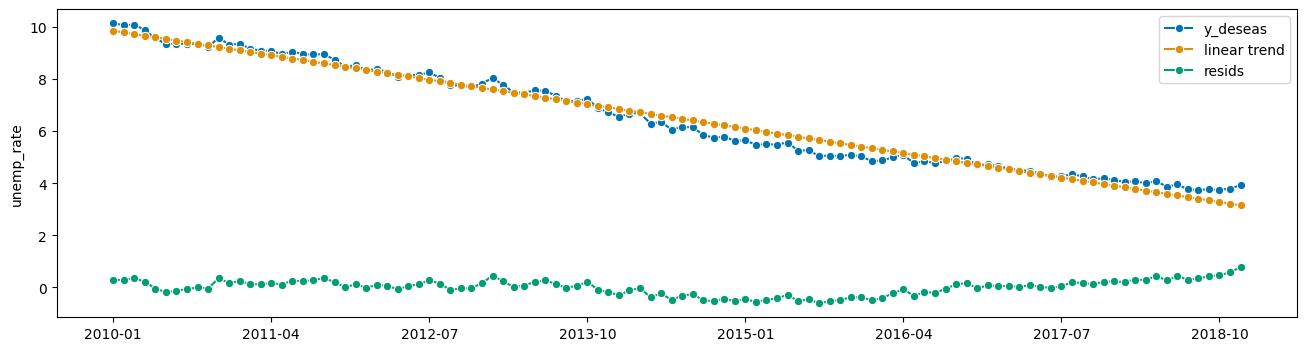

In [63]:
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
y_detrend = transformer.fit_transform(y_deseas)

# in-sample predictions
forecaster = PolynomialTrendForecaster(degree=1)
y_in_sample = (
    forecaster
    .fit(y_deseas)
    .predict(fh=-np.arange(len(y_deseas)))
)

plot_series(
    y_deseas, y_in_sample, y_detrend,
    labels=["y_deseas", "linear trend", "resids"])

Text(0.5, 1.0, 'MAPE: 7.40%')

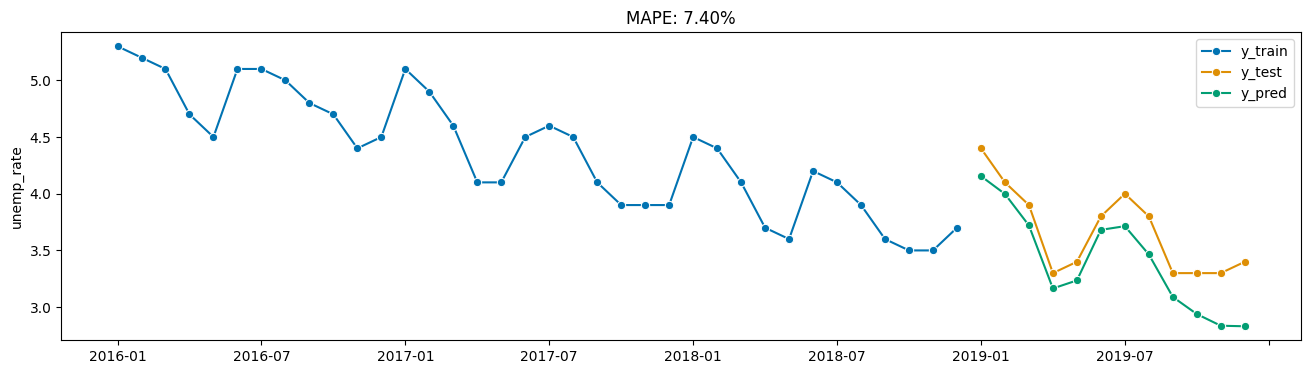

In [64]:
rf_pipe = TransformedTargetForecaster(
    steps = [
        ("deseasonalize", Deseasonalizer(model="additive", sp=12)),        ("detrend", Detrender(
            forecaster=PolynomialTrendForecaster(degree=1)
        )),
        ("forecast", rf_forecaster),
    ]
)
rf_pipe.fit(y_train)
y_pred_2 = rf_pipe.predict(fh)

mape_2 = mean_absolute_percentage_error(
    y_test, y_pred_2, symmetric=False
)
fig, ax = plot_series(
    y_train["2016":], y_test, y_pred_2,
    labels=["y_train", "y_test", "y_pred"])
ax.set_title(f"MAPE: {100*mape_2:.2f}%")

In [65]:
cv = ExpandingWindowSplitter(
    fh=list(range(1,13)),
    initial_window=12*5,
    step_length=12
)

cv_df = evaluate(
    forecaster=rf_pipe,    y=y,
    cv=cv,
    strategy="refit",
    return_data=True
)
cv_df

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred
0,0.017968,0.166975,0.092216,60,2014-12,Date 2010-01 10.6 2010-02 10.4 2010-03 ...,Date 2015-01 6.1 2015-02 5.8 2015-03 ...,2015-01 6.189424 2015-02 5.952330 2015-0...
1,0.072160,0.172139,0.087482,72,2015-12,Date 2010-01 10.6 2010-02 10.4 2010-03 ...,Date 2016-01 5.3 2016-02 5.2 2016-03 ...,2016-01 5.424690 2016-02 5.190662 2016-0...
2,0.092562,0.197725,0.090223,84,2016-12,Date 2010-01 10.6 2010-02 10.4 2010-03 ...,Date 2017-01 5.1 2017-02 4.9 2017-03 ...,2017-01 5.043032 2017-02 4.818143 2017-0...
3,0.099018,0.189982,0.092409,96,2017-12,Date 2010-01 10.6 2010-02 10.4 2010-03 ...,Date 2018-01 4.5 2018-02 4.4 2018-03 ...,2018-01 4.378566 2018-02 4.179892 2018-0...
4,0.074019,0.203381,0.092194,108,2018-12,Date 2010-01 10.6 2010-02 10.4 2010-03 ...,Date 2019-01 4.4 2019-02 4.1 2019-03 ...,2019-01 4.155310 2019-02 3.997724 2019-0...


In [66]:
for ind, row in cv_df.iterrows():
    print(f"Fold {ind} ----")
    print(f"Training: {row['y_train'].index.min()} - {row['y_train'].index.max()}")
    print(f"Training: {row['y_test'].index.min()} - {row['y_test'].index.max()}")

Fold 0 ----
Training: 2010-01 - 2014-12
Training: 2015-01 - 2015-12
Fold 1 ----
Training: 2010-01 - 2015-12
Training: 2016-01 - 2016-12
Fold 2 ----
Training: 2010-01 - 2016-12
Training: 2017-01 - 2017-12
Fold 3 ----
Training: 2010-01 - 2017-12
Training: 2018-01 - 2018-12
Fold 4 ----
Training: 2010-01 - 2018-12
Training: 2019-01 - 2019-12


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='unemp_rate'>)

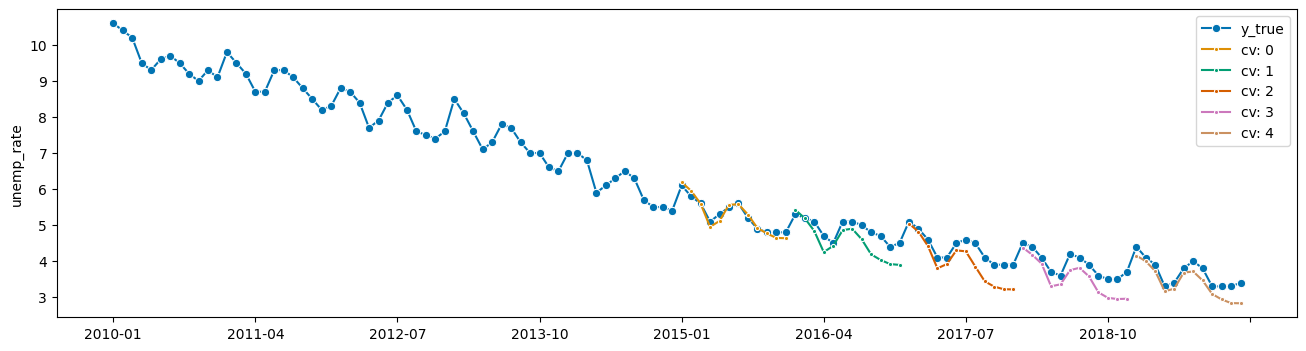

In [67]:
n_fold = len(cv_df)

plot_series(
    y,
    *[cv_df["y_pred"].iloc[x] for x in range(n_fold)],
    markers=["o", *["."] * n_fold],
    labels=["y_true"] + [f"cv: {x}"for x in range(n_fold)])



In [68]:
ensemble = EnsembleForecaster(
    forecasters = [
        ("autoarima", AutoARIMA(sp=12)),        ("rf_pipe", rf_pipe)
    ]
)
ensemble.fit(y_train)
y_pred_3 = ensemble.predict(fh)

C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-i

Text(0.5, 1.0, 'MAPE: 6.59%')

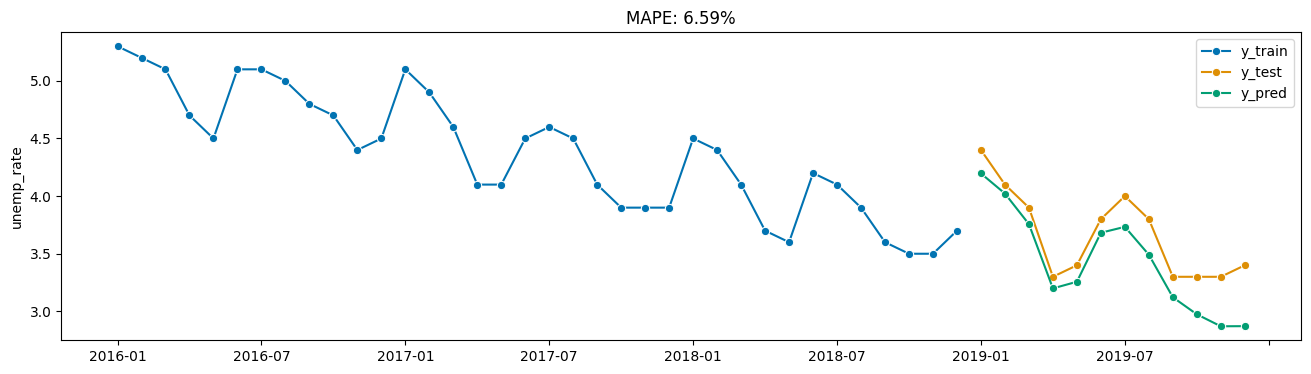

In [69]:
mape_3 = mean_absolute_percentage_error(
    y_test, y_pred_3, symmetric=False
)
fig, ax = plot_series(
    y_train["2016":], y_test, y_pred_3,
    labels=["y_train", "y_test", "y_pred"])
ax.set_title(f"MAPE: {100*mape_3:.2f}%")
#The fit of the ensemble model aggregating the reduced regression pipeline and AutoARIMA

<AxesSubplot: title={'center': 'Daily gold prices (2015-2019)'}, xlabel='Date'>

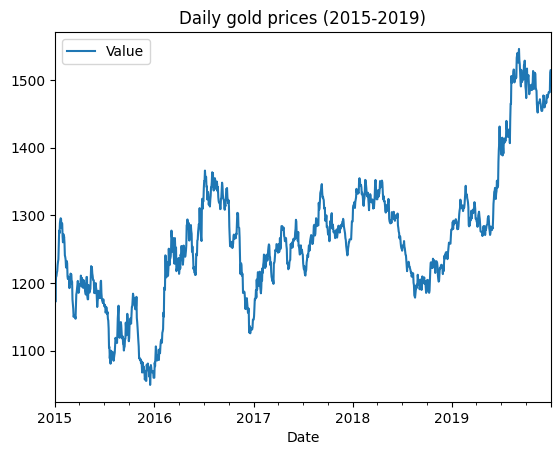

In [70]:
#Forecasting with Meta’s Prophet
#Prophet is an additive model (a form of generalized additive models or GAMs)
#Another important aspect of Prophet is the inclusion of changepoints in the process of estimating the trend, which makes the trend curve more flexible.


from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


df = nasdaqdatalink.get(
 dataset="WGC/GOLD_DAILY_USD",
 start_date="2015-01-01",
 end_date="2019-12-31"
)
df.plot(title="Daily gold prices (2015-2019)")

17:08:41 - cmdstanpy - INFO - Chain [1] start processing
17:08:43 - cmdstanpy - INFO - Chain [1] done processing


'\nThe black dots are the actual observations of the gold price.\nThe blue line representing the fit does not match the observations exactly, as the model \nsmooths out the noise in the data (also reducing the chance of overfitting).\nProphet attempts to quantify uncertainty, which is represented by the light blue intervals around the fitted line.\n\n'

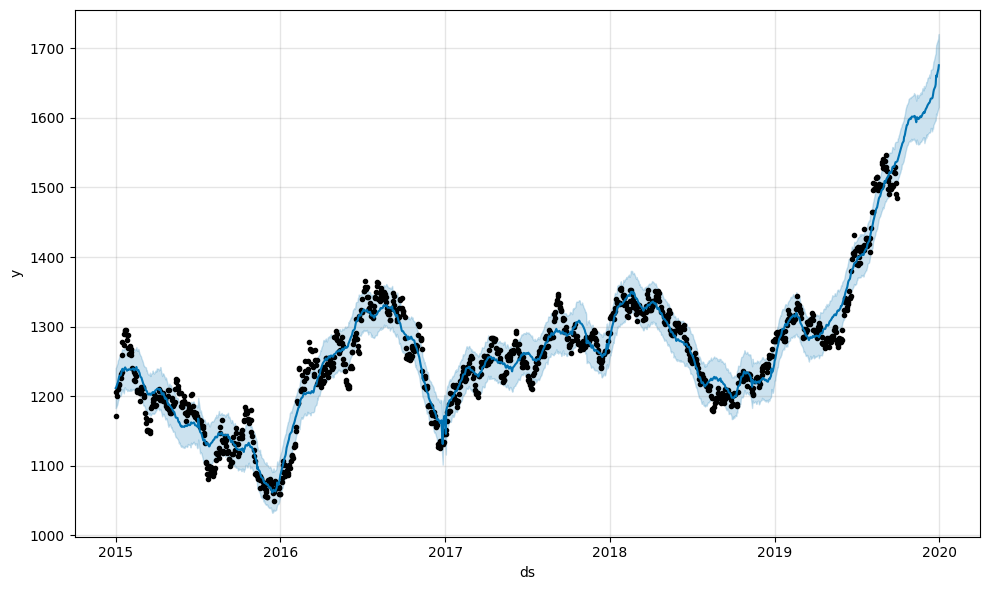

In [71]:
df = df.reset_index(drop=False)
df.columns = ["ds", "y"]

train_indices = df["ds"] < "2019-10-01"
df_train = df.loc[train_indices].dropna()
df_test = (
 df
 .loc[~train_indices]
 .reset_index(drop=True)
)

prophet = Prophet(changepoint_range=0.9)
prophet.add_country_holidays(country_name="US")
prophet.add_seasonality(
 name="monthly", period=30.5, fourier_order=5
)
prophet.fit(df_train)

df_future = prophet.make_future_dataframe(
 periods=len(df_test), freq="B"
)
df_pred = prophet.predict(df_future)
prophet.plot(df_pred)

'''
The black dots are the actual observations of the gold price.
The blue line representing the fit does not match the observations exactly, as the model 
smooths out the noise in the data (also reducing the chance of overfitting).
Prophet attempts to quantify uncertainty, which is represented by the light blue intervals around the fitted line.

'''

In [72]:
df_pred.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (Observed)', 'Christmas Day (Observed)_lower',
       'Christmas Day (Observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (Observed)',
       'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       'Thanksgiv

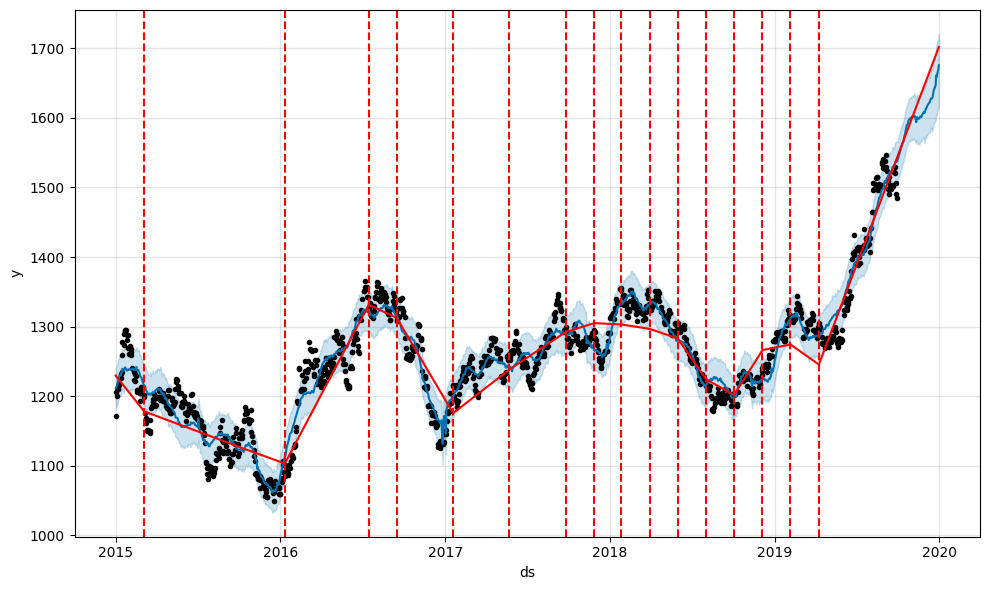

In [73]:
fig = prophet.plot(df_pred)
a = add_changepoints_to_plot(
 fig.gca(), prophet, df_pred
)
#Add changepoints to the plot:

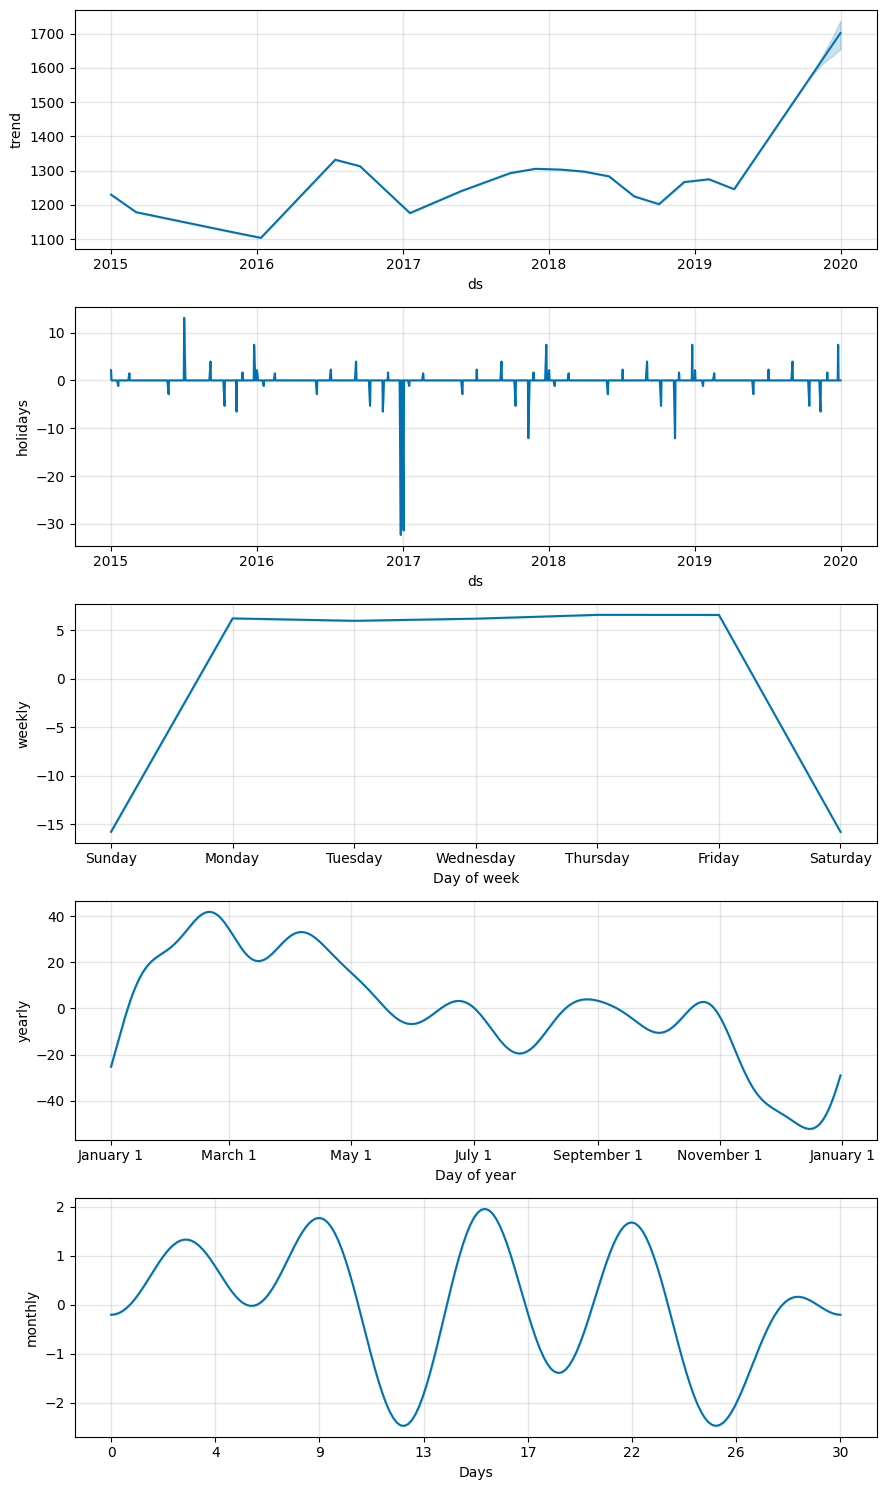

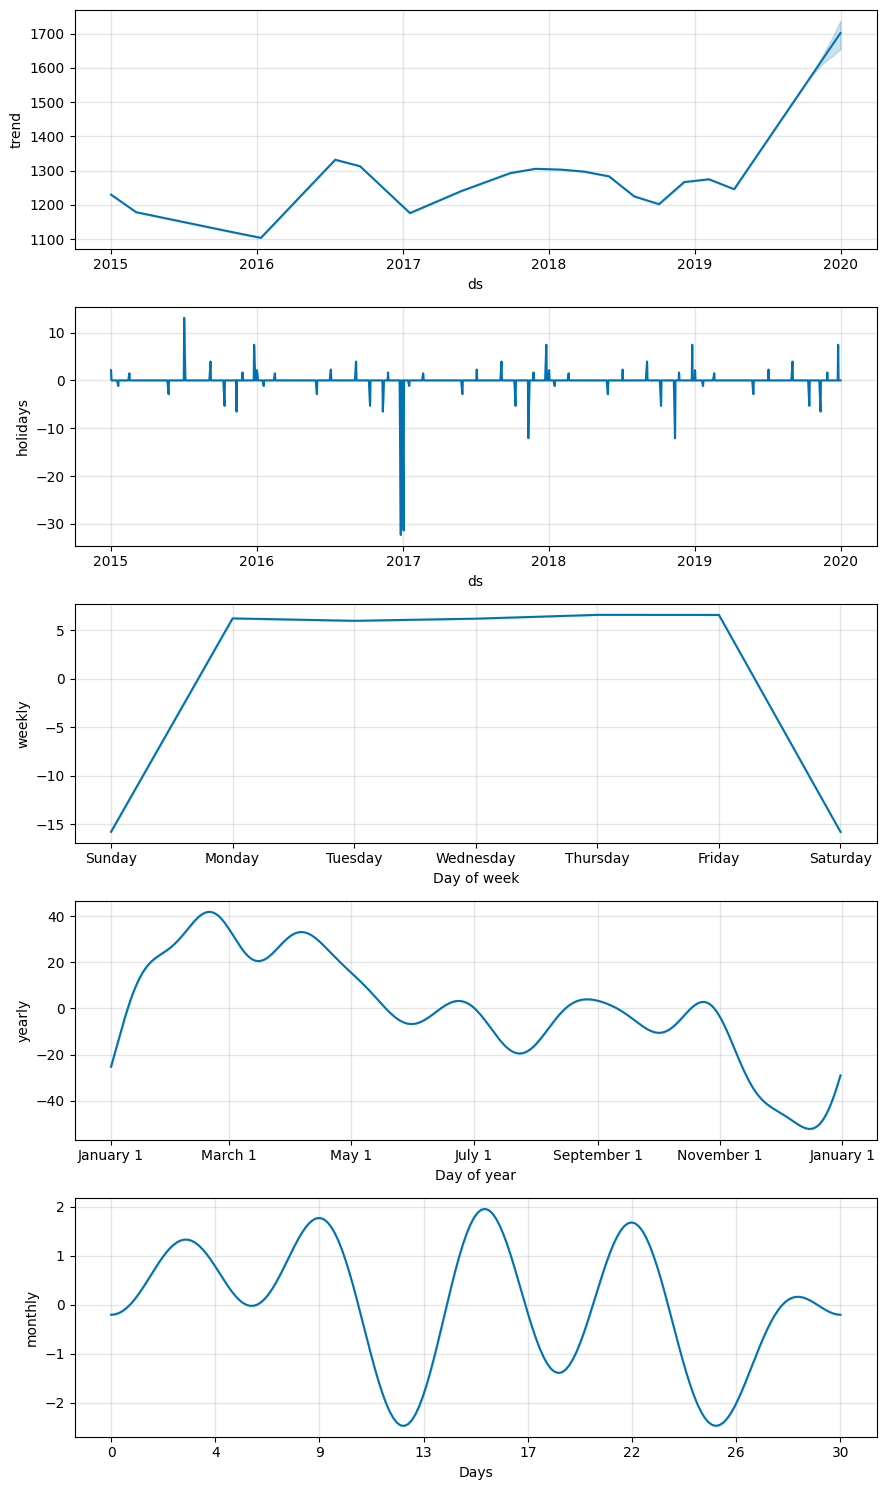

In [74]:
prophet.plot_components(df_pred)#decomposition

[Text(0.5, 1.0, 'Gold Price - actual vs. predicted')]

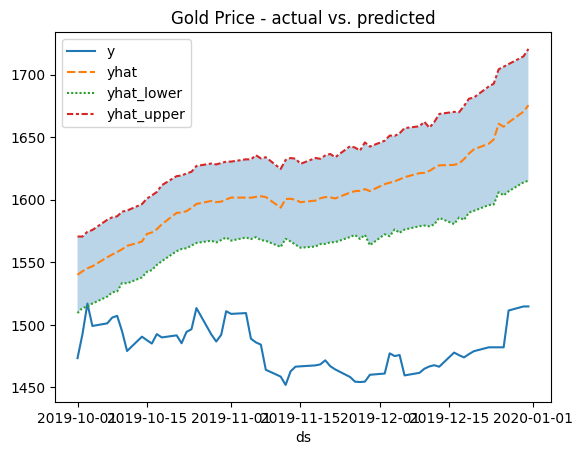

In [75]:
import seaborn as sns
SELECTED_COLS = [
 "ds", "yhat", "yhat_lower", "yhat_upper"
]
df_pred = (
 df_pred
 .loc[:, SELECTED_COLS]
 .reset_index(drop=True)
)
df_test = df_test.merge(df_pred, on=["ds"], how="left")
df_test["ds"] = pd.to_datetime(df_test["ds"])
df_test = df_test.set_index("ds")

fig, ax = plt.subplots(1, 1)
PLOT_COLS = [
 "y", "yhat", "yhat_lower", "yhat_upper"
]
ax = sns.lineplot(data=df_test[PLOT_COLS])
ax.fill_between(
 df_test.index,
 df_test["yhat_lower"],
 df_test["yhat_upper"],
 alpha=0.3
)

ax.set(
    title = "Gold Price - actual vs. predicted"
)